<a href="https://colab.research.google.com/github/GUmarEla/Image_Processing/blob/main/IV_ColorImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction


Basic Operations:
*   RGB_to_Gray(image)
*   RGB_to_HSV(image)
*   RGB_to_HLS(image)
*   color_balence(image, type)     
    color balence type: 'gray' or 'scale_max'
*   gamma_correction(image, gamma)

Enhancement Techniques:
*   histogram_equalization_channel(image)





### Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Load Image

In [ ]:
# Import necessary libraries
import numpy as np
import requests
import cv2

# Define the image URL
# url = 'https://boofcv.org/images/thumb/6/66/Kodim17_noisy.jpg/300px-Kodim17_noisy.jpg'
# url = 'https://i.sstatic.net/fkdjn.jpg'

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2N9OK2YKfUJp-zElKfTpuBbrUSfn1YFqp7A&s'

# Download the image
response = requests.get(url)
img_data = response.content

# Convert image data to a NumPy array
img_array = np.frombuffer(img_data, np.uint8)

# Decode the images
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### Basic Operations

**RGB to Gray**

In [ ]:
def RGB_to_Gray(image):
  result_image = np.zeros(image.shape[0:2], dtype=np.uint8)

  result_image = .299*image[:,:,2] + .587*image[:,:,1] + .114*image[:,:,0]

  return result_image

**RGB to HSV**

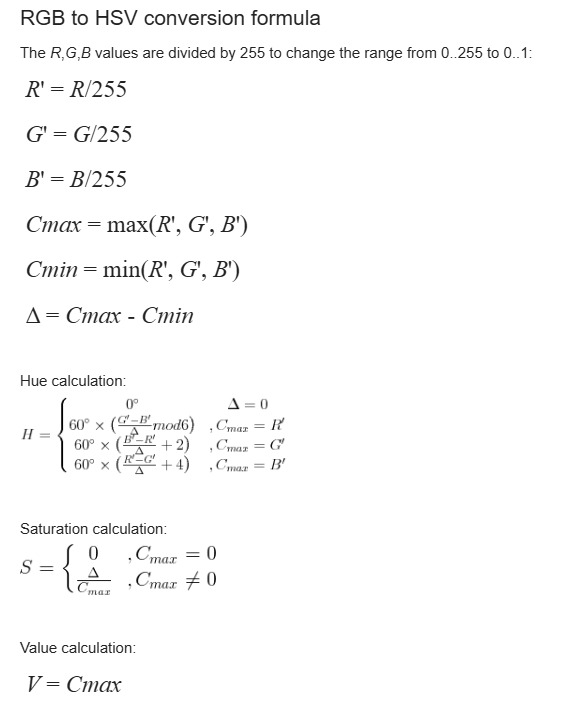

image from: https://www.rapidtables.com/

In [ ]:
def RGB_to_HSV(image):
  result_image = np.zeros(image.shape, np.uint8)

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      r, g, b = image[i, j, :] / 255.0

      cmax = max(r, g, b)
      cmin = min(r, g, b)
      delta = cmax - cmin

      # Hue calculation
      if delta == 0:
          h = 0
      elif cmax == r:
          h = (60 * ((g - b) / delta) + 360) % 360
      elif cmax == g:
          h = (60 * ((b - r) / delta) + 120) % 360
      elif cmax == b:
          h = (60 * ((r - g) / delta) + 240) % 360

      # Saturation calculation
      if delta == 0:
          s = 0
      else:
          s = delta / cmax

      # v calculation
      v = cmax

      # Scale hue to 0-179, lightness and saturation to 0-255
      h = int(h / 2)  # 0-179
      s = int(s * 255)
      v = int(v * 255)

      result_image[i, j, :] = [h, s, v]

  return result_image

**RGB to HLS**

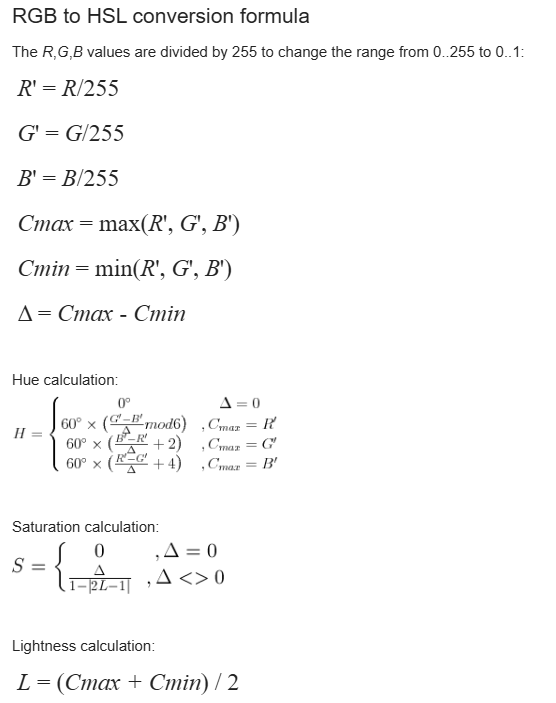

image from: https://www.rapidtables.com/

Second way to code the Hue

R,G,B: Original red, green, blue values (0-255).

R′,G′,B′: Normalized red, green, blue values (0-1).

*the method below is easy to calculate H*

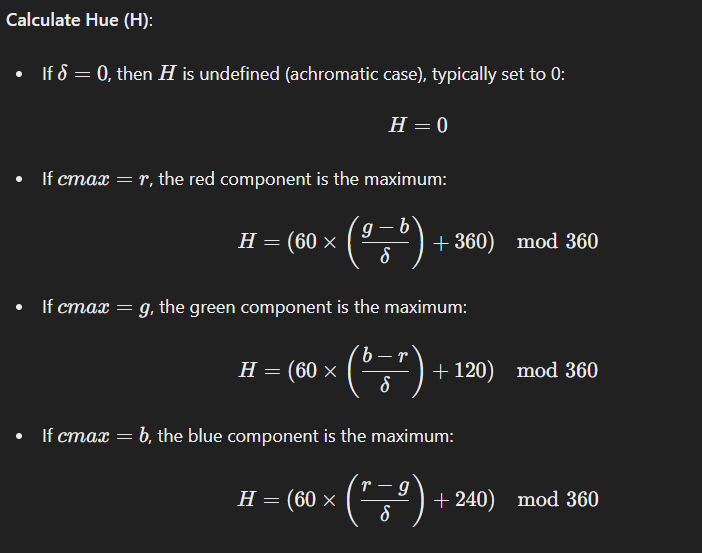

In [ ]:
def RGB_to_HLS(image):
  result_image = np.zeros(image.shape, np.uint8)

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      r, g, b = image[i, j, :] / 255.0

      cmax = max(r, g, b)
      cmin = min(r, g, b)
      delta = cmax - cmin

      # Hue calculation
      if delta == 0:
          h = 0
      elif cmax == r:
          h = (60 * ((g - b) / delta) + 360) % 360
      elif cmax == g:
          h = (60 * ((b - r) / delta) + 120) % 360
      elif cmax == b:
          h = (60 * ((r - g) / delta) + 240) % 360

      # Lightness calculation
      l1 = (cmax + cmin) / 2

      # Saturation calculation
      if delta == 0:
          s = 0
      else:
          s = delta / (1 - abs(2 * l1 - 1))

      # Scale hue to 0-179, lightness and saturation to 0-255
      h = int(h / 2)  # 0-179
      l1 = int(l1 * 255)
      s = int(s * 255)

      result_image[i, j, :] = [h, l1, s]

  return result_image

**Color Balence**

In [ ]:
import numpy as np
import cv2

def color_balence_gray(image):
  r, g, b = cv2.split(image)

  # find the mean of each channels
  r_mean = np.mean(r).round()
  g_mean = np.mean(g).round()
  b_mean = np.mean(b).round()

  # new channels
  new_r = (r*g_mean/r_mean).round()
  new_g = g
  new_b = (b*g_mean/b_mean).round()

  # result image
  result_image = np.zeros((image.shape), np.uint8)

  result_image[:, :, 0] = new_r
  result_image[:, :, 1] = new_g
  result_image[:, :, 2] = new_b

  return result_image

def color_balence_scale_max(image):
  r, g, b = cv2.split(image)

  # find the mean of each channels
  r_max = np.max(r)
  g_max = np.max(g)
  b_max = np.max(b)

  # new channels
  new_r = (r*(g_max/r_max)).round()
  new_g = g
  new_b = (b*(g_max/b_max)).round()

  # result image
  result_image = np.zeros((image.shape), np.uint8)

  result_image[:, :, 0] = new_r
  result_image[:, :, 1] = new_g
  result_image[:, :, 2] = new_b

  return result_image

def color_balence(image, type):

  if type == 'gray':
    return color_balence_gray(image)

  elif type == 'scale_max':
    return color_balence_scale_max(image)

**Gamma Correction**

In [ ]:
import numpy as np

def gamma_correction_channel(image, gamma):
  # normalize image
  normalize_image = image / 255.0

  # gamma correction
  gamma_image = normalize_image ** gamma

  # Denormalize the image
  result_image = (gamma_image * 255).round()

  # Clip the values
  result_image = np.clip(result_image, 0, 255).astype(np.uint8)

  return result_image


def gamma_correction(image, gamma):

  if len(image.shape) == 2:
    return gamma_correction_channel(image, gamma)

  elif len(image.shape) == 3:
    result_image = np.zeros((image.shape), np.uint8)

    r = image[:, :, 0]
    g = image[:, :, 1]
    b = image[:, :, 2]

    result_image[:,:,0] = gamma_correction_channel(r, gamma)
    result_image[:,:,1] = gamma_correction_channel(g, gamma)
    result_image[:,:,2] = gamma_correction_channel(b, gamma)

    return result_image

### Enhancement Techniques

**Histogram Equalization**

In [ ]:
import numpy as np
import pandas as pd
import cv2

def histogram_equalization_channel(image):
  hei, wid = image.shape
  pixel_list = np.arange(256)

  # Convert image to list
  image_flattened = image.flatten()

  # count repetetion of every pixel in the photo
  histogram_list = np.histogram(image_flattened, np.arange(257))[0]

  #  pixels and repetitions
  df = pd.DataFrame({'pixels':pixel_list, "repetetion":histogram_list})

  # PDF
  df["PDF"] = df['repetetion'] / (df['repetetion'].sum())

  # CDF
  df['CDF'] = np.cumsum(df["PDF"] )

  # Sk
  df['Sk'] = df['CDF'] * 255

  #  Histogram equalization
  df['Hist_equalization'] = df['Sk'].round().astype(image.dtype)

  # Efficiently map the original pixel values to the equalized values using numpy indexing
  equalization_map = df.set_index('pixels')['Hist_equalization'].to_dict()
  equalized_flattened = np.vectorize(equalization_map.get)(image_flattened)

  # Reshape the flat array back to the original image shape
  reshaped_image = np.reshape(equalized_flattened, (hei, wid))

  return reshaped_image

def histogram_equalization(image):
  if len(image.shape) == 2:
    return histogram_equalization_channel(image)

  elif len(image.shape) == 3:
    # result_image = np.zeros((image.shape), np.uint8)
    r, g, b = cv2.split(image)

    r_new = histogram_equalization_channel(r)
    g_new = histogram_equalization_channel(g)
    b_new = histogram_equalization_channel(b)

    result_image = cv2. merge([r_new, g_new, b_new])

  return result_image